In [7]:
import warnings

In [ ]:
warnings.filter_warnings('ignore')

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Input

# Load the data
df = pd.read_csv('Alcohol_Sales.csv')
df.columns=['DATE','Sales']
print(df)

# Create lag features
df['Sale_LastMonth'] = df['Sales'].shift(+1)
df['Sale_2Monthsback'] = df['Sales'].shift(+2)
df['Sale_3Monthback'] = df['Sales'].shift(+3)
print(df)

# Drop rows with missing values
df = df.dropna()

# Prepare input (x) and output (y)
x = df.iloc[:, 2:]
y = df.iloc[:, 1:2]

# Split the data into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

# Normalize the data
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
ytrain = scaler.fit_transform(ytrain)
ytest = scaler.transform(ytest)

# Define the Keras model
def create_model(input_dim, optimizer='adam'):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Input shape
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Regression output
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Wrap the model using KerasRegressor
model = KerasRegressor(build_fn=create_model, input_dim=xtrain.shape[1], verbose=0)

# Define the grid search parameters
param_grid = {
    'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
    'batch_size': [5, 10],
    'epochs': [100, 200]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(xtrain, ytrain)

# Save grid search results to CSV
results_df = pd.DataFrame(grid_result.cv_results_)
results_df.to_csv('grid_search_results.csv', index=False)

# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


           DATE  Sales
0    1992-01-01   3459
1    1992-02-01   3458
2    1992-03-01   4002
3    1992-04-01   4564
4    1992-05-01   4221
..          ...    ...
320  2018-09-01  12396
321  2018-10-01  13914
322  2018-11-01  14174
323  2018-12-01  15504
324  2019-01-01  10718

[325 rows x 2 columns]
           DATE  Sales  Sale_LastMonth  Sale_2Monthsback  Sale_3Monthback
0    1992-01-01   3459             NaN               NaN              NaN
1    1992-02-01   3458          3459.0               NaN              NaN
2    1992-03-01   4002          3458.0            3459.0              NaN
3    1992-04-01   4564          4002.0            3458.0           3459.0
4    1992-05-01   4221          4564.0            4002.0           3458.0
..          ...    ...             ...               ...              ...
320  2018-09-01  12396         14257.0           12640.0          14583.0
321  2018-10-01  13914         12396.0           14257.0          12640.0
322  2018-11-01  14174         139

2025-01-07 10:43:20.121184: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 10:43:20.159355: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-07 10:43:20.159567: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 10:43:20.159964: I tensorflow/core/util/port.cc:153

Best: 0.850305 using {'batch_size': 5, 'epochs': 200, 'optimizer': 'SGD'}
0.836999 (0.023007) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'SGD'}
0.846302 (0.025439) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'RMSprop'}
0.848347 (0.024910) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Adagrad'}
0.837879 (0.027992) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Adadelta'}
0.845385 (0.028372) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Adam'}
0.834905 (0.023873) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Adamax'}
0.837723 (0.020376) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'Nadam'}
0.850305 (0.018158) with: {'batch_size': 5, 'epochs': 200, 'optimizer': 'SGD'}
0.841879 (0.022144) with: {'batch_size': 5, 'epochs': 200, 'optimizer': 'RMSprop'}
0.843529 (0.023439) with: {'batch_size': 5, 'epochs': 200, 'optimizer': 'Adagrad'}
0.841412 (0.032838) with: {'batch_size': 5, 'epochs': 200, 'optimizer': 'Adadelta'}
0.844481 (0.031136) with:

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Input

# Load the data
df = pd.read_csv('Alcohol_Sales.csv')
df.columns=['DATE','Sales']
print(df)

# Create lag features
df['Sale_LastMonth'] = df['Sales'].shift(+1)
df['Sale_2Monthsback'] = df['Sales'].shift(+2)
df['Sale_3Monthback'] = df['Sales'].shift(+3)
print(df)

# Drop rows with missing values
df = df.dropna()

# Prepare input (x) and output (y)
x = df.iloc[:, 2:]
y = df.iloc[:, 1:2]

# Split the data into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

# Normalize the data
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
ytrain = scaler.fit_transform(ytrain)
ytest = scaler.transform(ytest)

# Define the Keras model with hyperparameters
def create_model(input_dim, optimizer='adam', layers=1, activation='relu', neurons=12):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Input layer
    
    # Add hidden layers dynamically based on the 'layers' parameter
    for _ in range(layers):
        model.add(Dense(neurons, activation=activation))
    
    # Output layer
    model.add(Dense(1, activation='linear'))  # Linear activation for regression
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Wrap the model using KerasRegressor and pass hyperparameters via `build_fn` arguments
model = KerasRegressor(
    build_fn=create_model, 
    input_dim=xtrain.shape[1], 
    verbose=0
)

# Define the grid search parameters
param_grid = {
    'build_fn__optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
    'build_fn__layers': [1, 2, 3],  # Number of hidden layers
    'build_fn__activation': ['relu', 'tanh', 'sigmoid'],  # Activation functions
    'build_fn__neurons': [8, 12, 16],  # Number of neurons per layer
    'batch_size': [5, 10],
    'epochs': [100, 200]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(xtrain, ytrain)

# Save grid search results to CSV
results_df = pd.DataFrame(grid_result.cv_results_)
results_df.to_csv('grid_search_results_layers_activation_neurons_fixed.csv', index=False)

# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


           DATE  Sales
0    1992-01-01   3459
1    1992-02-01   3458
2    1992-03-01   4002
3    1992-04-01   4564
4    1992-05-01   4221
..          ...    ...
320  2018-09-01  12396
321  2018-10-01  13914
322  2018-11-01  14174
323  2018-12-01  15504
324  2019-01-01  10718

[325 rows x 2 columns]
           DATE  Sales  Sale_LastMonth  Sale_2Monthsback  Sale_3Monthback
0    1992-01-01   3459             NaN               NaN              NaN
1    1992-02-01   3458          3459.0               NaN              NaN
2    1992-03-01   4002          3458.0            3459.0              NaN
3    1992-04-01   4564          4002.0            3458.0           3459.0
4    1992-05-01   4221          4564.0            4002.0           3458.0
..          ...    ...             ...               ...              ...
320  2018-09-01  12396         14257.0           12640.0          14583.0
321  2018-10-01  13914         12396.0           14257.0          12640.0
322  2018-11-01  14174         139

2025-01-07 10:54:49.291309: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different 2025-01-07 10:54:49.291309: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 10:54:49.321444: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 10:54:49.327224: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized t

AttributeError: 'function' object has no attribute 'set_params'

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define build_fn
def build_model(activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(32, input_dim=10, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the model
model = KerasRegressor(model=build_model, verbose=0)

# Define parameter grid
param_grid = {
    'model__activation': ['relu', 'tanh'],  # Correct parameter names
    'model__optimizer': ['adam', 'sgd'],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Run GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
xtrain = np.random.rand(100, 10)
ytrain = np.random.rand(100)
grid_result = grid.fit(xtrain, ytrain)

print("Best Parameters:", grid_result.best_params_)


2025-01-07 10:56:40.253504: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 10:56:40.282172: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 10:56:40.284208: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 10:56:40.289528: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized t

Best Parameters: {'batch_size': 32, 'epochs': 10, 'model__activation': 'relu', 'model__optimizer': 'sgd'}


In [18]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Input

# Define the model creation function
def create_model(input_dim, optimizer='adam', num_layers=2, activation='relu', units=12):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Input layer
    
    # Add hidden layers dynamically based on num_layers and units
    for _ in range(num_layers):
        model.add(Dense(units, activation=activation))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Wrapping the Keras model using KerasRegressor
model = KerasRegressor(build_fn=create_model, input_dim=xtrain.shape[1], verbose=0)

# Define the grid search parameters
param_grid = {
    'optimizer': ['SGD', 'RMSprop', 'Adam'],  # Optimizers
    'num_layers': [1, 2, 3],                 # Number of layers
    'activation': ['relu', 'tanh'],          # Activation functions
    'units': [8, 16, 32],                    # Units per layer
    'batch_size': [5, 10],                   # Batch sizes
    'epochs': [50, 100]                      # Number of epochs
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(xtrain, ytrain)

# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


2025-01-07 11:09:10.723778: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 11:09:10.748384: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 11:09:10.760573: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-07 11:09:10.764562: I tensorflow/core/util/port.cc:153

ValueError: Invalid parameter activation for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(activation=relu)`
Check the list of available parameters with `estimator.get_params().keys()`

Original columns: Index(['DATE', 'S4248SM144NCEN'], dtype='object')
         DATE  Sales
0  1992-01-01   3459
1  1992-02-01   3458
2  1992-03-01   4002
3  1992-04-01   4564
4  1992-05-01   4221


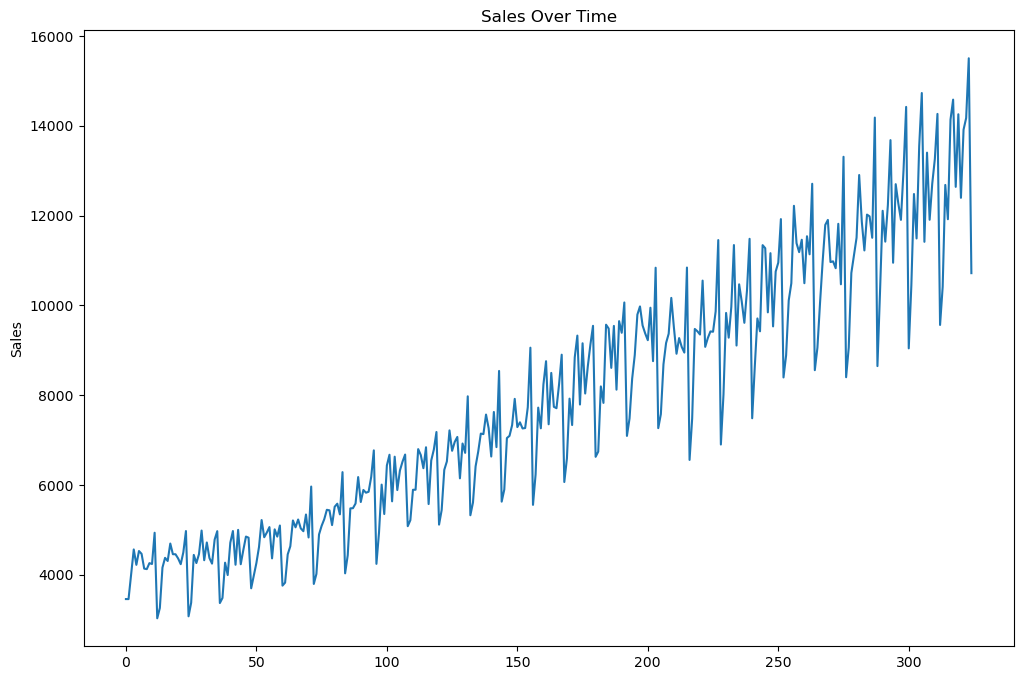

2025-01-07 11:17:44.804014: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 11:17:44.818955: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 11:17:44.835315: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 11:17:44.841223: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized t

Best: 0.8580051307719633 using {'batch_size': 5, 'epochs': 100, 'model__dropout_rate': 0.2, 'model__num_layers': 1, 'model__num_units': 64, 'model__optimizer': 'rmsprop'}


TypeError: cannot unpack non-iterable float object

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout

# Load the data
df = pd.read_csv('Alcohol_Sales.csv')

# Debug: Print column names to identify the sales column
print("Original columns:", df.columns)

# Adjust column names based on actual dataset
df.columns = ['DATE', 'Sales']  # Adjust if necessary

# Debug: Verify the updated DataFrame
print(df.head())

# Plot the sales data
df['DATE'] = pd.to_datetime(df['DATE'])

plt.figure(figsize=(12, 8))
plt.plot(df['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.ylabel('Sales')
plt.show()

# Create lag features for past months
df['Sale_LastMonth'] = df['Sales'].shift(+1)
df['Sale_2Monthsback'] = df['Sales'].shift(+2)
df['Sale_3Monthback'] = df['Sales'].shift(+3)

# Drop rows with missing values (due to shifting)
df = df.dropna()

# Prepare input (X) and output (y)
x = df.iloc[:, 2:].values  # Lag features
y = df.iloc[:, 1:2].values  # Current sales

# Split the data into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

# Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

xtrain = scaler_x.fit_transform(xtrain)
xtest = scaler_x.transform(xtest)
ytrain = scaler_y.fit_transform(ytrain)
ytest = scaler_y.transform(ytest)

# Reshape input for CNN (samples, time steps, features)
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))
xtest = xtest.reshape((xtest.shape[0], xtest.shape[1], 1))

# Define a function to create the Keras model
def create_model(optimizer='adam', num_units=64, num_layers=2, dropout_rate=0.2):
    model = Sequential()
    model.add(Conv1D(filters=num_units, kernel_size=2, activation='relu', input_shape=(xtrain.shape[1], 1)))
    for _ in range(num_layers - 1):
        model.add(Conv1D(filters=num_units // 2, kernel_size=2, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(num_units, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Wrap the model in KerasRegressor
model = KerasRegressor(model=create_model, verbose=0)

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__num_units': [32, 64, 128],
    'model__num_layers': [1, 2, 3],
    'model__dropout_rate': [0.2, 0.3],
    'batch_size': [5, 10],
    'epochs': [50, 100]
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(xtrain, ytrain)

# Summarize the best results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
loss, mae = best_model.score(xtest, ytest)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Predict and plot predictions
predict = best_model.predict(xtest)
predict = scaler_y.inverse_transform(predict.reshape(-1, 1))
ytest_inverse = scaler_y.inverse_transform(ytest)

plt.figure(figsize=(12, 8))
plt.plot(predict, label='Predicted Sales')
plt.plot(ytest_inverse, label='Actual Sales')
plt.legend(loc='upper left')
plt.title('Predicted vs Actual Sales')
plt.show()
